In [775]:
import numpy as np
import pandas as pd

In [776]:
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    def __init__(self, num_iter=100, lr=0.001, no_bias=False, verbose=False, random_state=0, lamda=1, proba_threshold=0.5):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.random_state = random_state
        self.lamda = lamda
        self.proba_threshold = proba_threshold

    def _init_theta(self, lower, higher, size):
        """
        Generate initially random parameters value
        Parameters
        ----------
        lower: float
        left boudary
        higher: float
        right boudary
        size: int
        size of ndarray (size, )
        Returns
        -------
        The following form of ndarray, shape (n_samples,)
        Parameters vector
        """
        np.random.seed(self.random_state)
        return np.random.uniform(lower, higher, size)
  
    def _logistic_hypothesis(self, X, theta):
        """
        Compute a hypothetical function
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
        Training data
        theta: The following forms of ndarray, shape (n_features, )
        Parameters vector
        Returns
        -------
        The following form of ndarray, shape (n_samples, 1)
        Estimated result by hypothetical function
        """
        return (1 / (1 + np.exp(-(X @ theta.T)))).astype(np.longdouble)
    
    def _diff(self, X, y, theta):
        d_theta = ((X.T @ np.absolute(self._logistic_hypothesis(X, theta) - y)) / y.shape[0]).astype(np.longdouble)
        d_theta[1:] = d_theta[1:] + (self.lamda / y.shape[0]) * theta[1:]
        return d_theta

    def _gradient_descent(self, X, y, error):
        """
        Compute the parameters values that minimize the cost function based on self.num_iter, self.lr.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
        Training data
        y : The following form of ndarray, shape (n_samples,)
        Correct answer value of training data
        error: The following form of ndarray, shape (self.iter,)
        Loss records
        Returns
        -------
        theta: The following form of ndarray, shape (n_features, )
        Optimized parameters
        """
        theta = self._init_theta(-10, 10, X.shape[1])
        error[0] = self._compute_loss(self._logistic_hypothesis(X, theta), y, theta)
        if (self.verbose):
            print("iter: {}     loss: {}".format(0, error[0]))
        for i in range(1, self.iter):
            theta = theta - self.lr * self._diff(X, y, theta)
            error[i] = self._compute_loss(self._logistic_hypothesis(X, theta), y, theta)
            if (self.verbose):
                print("iter: {}     loss: {}".format(i, error[i]))

        return theta

    def _compute_loss(self, y_pred, y, theta):
        term1 = (-y @ np.log(y_pred).T).astype(np.longdouble)
        term2 = (-(1 - y) @ np.log(1 - y_pred).T).astype(np.longdouble)
        return ((term1 + term2) / y.shape[0]) + (self.lamda / (2 * y.shape[0])) * (theta[1:] @ theta[1:].T)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        self._y_unique = np.unique(y)
        y = np.where(y == self._y_unique[0], 0, 1)
        if ((X_val is not None) and (y_val is not None)):
            y_val = np.where(y_val == self._y_unique[0], 0, 1)
            
        if self.verbose:
            #Output learning process when verbose is set to True
            if self.no_bias == False:
                print("Train data: Set bias column to an array of value 1")
                bias_ndarray = np.ones(X.shape[0]).reshape(X.shape[0], 1)
                print("Train data: Add bias column")
                X_train = np.concatenate((bias_ndarray, X), axis = 1)
                print("Train data: Training with gradient descent to find the optimized parameters...")
                self.theta_fit = self._gradient_descent(X_train, y, self.loss)
                print("Train data: Finish training!")

                if ((X_val is not None) and (y_val is not None)):
                    print("Validation data: Set bias column to an array of value 1")
                    val_bias_ndarray = np.ones(X_val.shape[0]).reshape(X_val.shape[0], 1)
                    print("Validation data: Add bias column")
                    X_val_train = np.concatenate((val_bias_ndarray, X_val), axis = 1)
                    print("Validation data: Training with gradient descent to find the optimized parameters...")
                    self._gradient_descent(X_val_train, y_val, self.val_loss)
                    print("Validation data: Finish training!")
            
            else:
                print("Train data: Training with gradient descent to find the optimized parameters...")
                self.theta_fit = self._gradient_descent(X, y, self.loss)
                print("Train data: Finish training!")

                if ((X_val is not None) and (y_val is not None)):
                    print("Validation data: Training with gradient descent to find the optimized parameters...")
                    self._gradient_descent(X_val, y_val, self.val_loss)
                    print("Validation data: Finish training!")
                
        else:
            if self.no_bias == False:
                bias_ndarray = np.ones(X.shape[0]).reshape(X.shape[0], 1)
                X_train = np.concatenate((bias_ndarray, X), axis = 1)
                self.theta_fit = self._gradient_descent(X_train, y, self.loss)

                if ((X_val is not None) and (y_val is not None)):
                    val_bias_ndarray = np.ones(X_val.shape[0]).reshape(X_val.shape[0], 1)
                    X_val_train = np.concatenate((val_bias_ndarray, X_val), axis = 1)
                    self._gradient_descent(X_val_train, y_val, self.val_loss)
            
            else:
                self.theta_fit = self._gradient_descent(X, y, self.loss)

                if ((X_val is not None) and (y_val is not None)):
                    self._gradient_descent(X_val, y_val, self.val_loss)

    def predict(self, X):
        """
        Estimate the label using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        proba_threshold: float
            0 < proba_threshold < 1
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        y_proba = self.predict_proba(X)
        return np.where(y_proba < 0.5, self._y_unique[0], self._y_unique[1])

    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        if self.no_bias == False:
            bias_ndarray = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X_test = np.concatenate((bias_ndarray, X), axis = 1)
            y_pred_proba = self._logistic_hypothesis(X_test, self.theta_fit)
        else:
            y_pred_proba = self._logistic_hypothesis(X, self.theta_fit)
        
        return y_pred_proba

<h3>[Problem 5] Learning and estimation</h3>

In [777]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [778]:
iris_data = load_iris()

iris_df = pd.DataFrame({
        'sepal_length': iris_data['data'][50:, 0], 
        'petal_length': iris_data['data'][50:, 2], 
        'Species': iris_data['target'][50:]
        })

display(iris_df.head())
display(iris_df.shape)
iris_df['Species'].value_counts()

,sepal_length,petal_length,Species
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


(100, 3)

2    50
1    50
Name: Species, dtype: int64

In [779]:
X = iris_df.to_numpy()[:, :-1]
y = iris_df.to_numpy()[:, -1]

print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (100, 2)
y shape: (100,)


In [780]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

(75, 2)
(25, 2)
(75,)
(25,)


In [781]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [782]:
def compute_score(y_pred, y):
    print("Accuracy: {}".format(metrics.accuracy_score(y_pred=y_pred, y_true=y)))
    print("Precision: {}".format(metrics.precision_score(y_pred=y_pred, y_true=y)))
    print("Recall: {}".format(metrics.recall_score(y_pred=y_pred, y_true=y)))
    print("F1: {}".format(metrics.f1_score(y_pred=y_pred, y_true=y)))

<h4>Scratch training</h4>

In [764]:
model_scratch = ScratchLogisticRegression(num_iter=500000, lr=0.0000001, lamda=1000, random_state=1, proba_threshold=0.5, no_bias=True)
model_scratch.fit(X_train_std, y_train, X_test_std, y_test)
y_pred_scratch = model_scratch.predict(X_test_std)

compute_score(y_pred_scratch, y_test)

Accuracy: 0.92
Precision: 1.0
Recall: 0.875
F1: 0.9333333333333333


<h4>Sklearn training</h4>

In [765]:
from sklearn.linear_model import LogisticRegression

In [766]:
model_sklearn = LogisticRegression()
model_sklearn.fit(X_train_std, y_train)
y_pred_sklearn = model_sklearn.predict(X_test_std)

compute_score(y_pred_sklearn, y_test)

Accuracy: 0.88
Precision: 0.9333333333333333
Recall: 0.875
F1: 0.9032258064516129


<h3>[Problem 6] Plot of learning curve</h3>

In [767]:
def draw_learning_curve(train_loss, val_loss, iter, title):
    plt.plot(list(np.arange(0, iter)), train_loss, label='train_loss')
    plt.plot(list(np.arange(0, iter)), val_loss, label='val_loss')
    plt.title(title)
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.grid()
    plt.legend()
    plt.show()

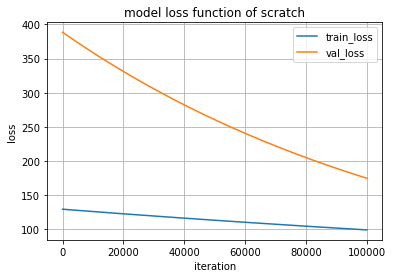

Final train_loss: 99.35595738033602
Final val_loss: 174.88740958660787


In [768]:
draw_learning_curve(model_scratch.loss, model_scratch.val_loss, model_scratch.iter, 'model loss function of scratch')

print("Final train_loss: {}".format(model_scratch.loss[-1]))
print("Final val_loss: {}".format(model_scratch.val_loss[-1]))

<h3>[Problem 7] Visualization of decision area</h3>

In [769]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

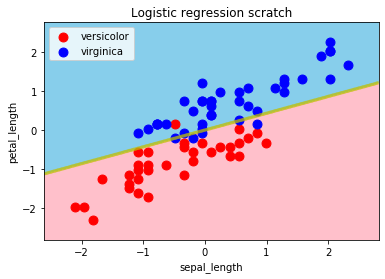

In [770]:
decision_region(
    X_train_std, 
    y_train, 
    model_scratch, 
    title="Logistic regression scratch", 
    xlabel="sepal_length", 
    ylabel="petal_length"
)

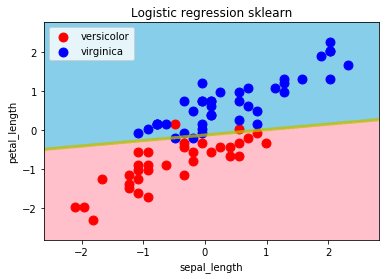

In [771]:
decision_region(
    X_train_std, 
    y_train, 
    model_sklearn, 
    title="Logistic regression sklearn", 
    xlabel="sepal_length", 
    ylabel="petal_length"
)

<h3>[Problem 8] (Advance assignment) Saving weights</h3>

In [772]:
np.savez('theta_fitted.npz', model_scratch.theta_fit)

In [773]:
npzfile = np.load('theta_fitted.npz')
sorted(npzfile)

['arr_0']

In [774]:
npzfile['arr_0']

array([-1.65947976,  3.85645185], dtype=float128)